In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2021-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2021_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,사하구,10492,사하구,3067,41.31%,"8,959"
1,2021-01-07,간장,오복왕표 0.9ℓ 1병,6350,사하구,6677,사하구,327,5.15%,"6,514"
2,2021-01-07,갈치,60cm정도 500g 1마리(냉동),10900,사하구,17000,사하구,6100,55.96%,"13,950"
3,2021-01-07,고등어,30㎝정도 500g 1마리,3800,사하구,4991,사하구,1191,31.34%,"4,396"
4,2021-01-07,달걀,오경슈퍼란60g정도 10개,2980,사하구,2990,사하구,10,0.34%,"2,985"
5,2021-01-07,닭고기,육계 1.0㎏,8980,사하구,9000,사하구,20,0.22%,"8,990"
6,2021-01-07,대파,1.0㎏,4271,사하구,4600,사하구,329,7.7%,"4,436"
7,2021-01-07,돼지고기,삼겹살 500g,9400,사하구,9950,사하구,550,5.85%,"9,675"
8,2021-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4531,사하구,4531,사하구,0,0.0%,"4,531"
9,2021-01-07,라면,신라면 120g 1봉지,676,사하구,676,사하구,0,0.0%,676


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2021-04-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2021_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-04-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",3712,사하구,10492,사하구,6780,182.65%,"7,102"
1,2021-04-08,간장,오복왕표 0.9ℓ 1병,6350,사하구,6677,사하구,327,5.15%,"6,514"
2,2021-04-08,갈치,60cm정도 500g 1마리(냉동),10900,사하구,11800,사하구,900,8.26%,"11,350"
3,2021-04-08,달걀,오경슈퍼란60g정도 10개,3590,사하구,3680,사하구,90,2.51%,"3,635"
4,2021-04-08,닭고기,육계 1.0㎏,6990,사하구,8980,사하구,1990,28.47%,"7,985"
5,2021-04-08,대파,1.0㎏,8542,사하구,9983,사하구,1441,16.87%,"9,263"
6,2021-04-08,돼지고기,삼겹살 500g,8900,사하구,9950,사하구,1050,11.8%,"9,425"
7,2021-04-08,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5194,사하구,0,0.0%,"5,194"
8,2021-04-08,라면,신라면 120g 1봉지,676,사하구,676,사하구,0,0.0%,676
9,2021-04-08,맥주,하이트 500㎖ 1병,1420,사하구,1440,사하구,20,1.41%,"1,430"


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2021-07-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2021_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-07-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5992,사하구,7425,사하구,1433,23.92%,"6,709"
1,2021-07-08,간장,오복왕표 0.9ℓ 1병,5480,사하구,6350,사하구,870,15.88%,"5,915"
2,2021-07-08,갈치,60cm정도 500g 1마리(냉동),11890,사하구,12800,사하구,910,7.65%,"12,345"
3,2021-07-08,고등어,30㎝정도 500g 1마리,3750,사하구,5250,사하구,1500,40.0%,"4,500"
4,2021-07-08,달걀,오경슈퍼란60g정도 10개,3590,사하구,3980,사하구,390,10.86%,"3,785"
5,2021-07-08,닭고기,육계 1.0㎏,6990,사하구,8980,사하구,1990,28.47%,"7,985"
6,2021-07-08,대파,1.0㎏,2475,사하구,3316,사하구,841,33.98%,"2,896"
7,2021-07-08,돼지고기,삼겹살 500g,11450,사하구,14900,사하구,3450,30.13%,"13,175"
8,2021-07-08,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5194,사하구,0,0.0%,"5,194"
9,2021-07-08,라면,신라면 120g 1봉지,676,사하구,676,사하구,0,0.0%,676


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2021-10-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2021_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-10-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",4492,사하구,5925,사하구,1433,31.9%,"5,209"
1,2021-10-07,간장,오복왕표 0.9ℓ 1병,6900,사하구,6990,사하구,90,1.3%,"6,945"
2,2021-10-07,갈치,60cm정도 500g 1마리(냉동),9600,사하구,12900,사하구,3300,34.38%,"11,250"
3,2021-10-07,고등어,30㎝정도 500g 1마리,3555,사하구,4990,사하구,1435,40.37%,"4,273"
4,2021-10-07,달걀,오경슈퍼란60g정도 10개,3590,사하구,3980,사하구,390,10.86%,"3,785"
5,2021-10-07,닭고기,육계 1.0㎏,5990,사하구,8980,사하구,2990,49.92%,"7,485"
6,2021-10-07,대파,1.0㎏,3237,사하구,3316,사하구,79,2.44%,"3,277"
7,2021-10-07,돼지고기,삼겹살 500g,12950,사하구,15400,사하구,2450,18.92%,"14,175"
8,2021-10-07,두부,500g 판두부(국산포장두부 420g) 1모,5194,사하구,5515,사하구,321,6.18%,"5,355"
9,2021-10-07,라면,신라면 120g 1봉지,736,사하구,738,사하구,2,0.27%,737


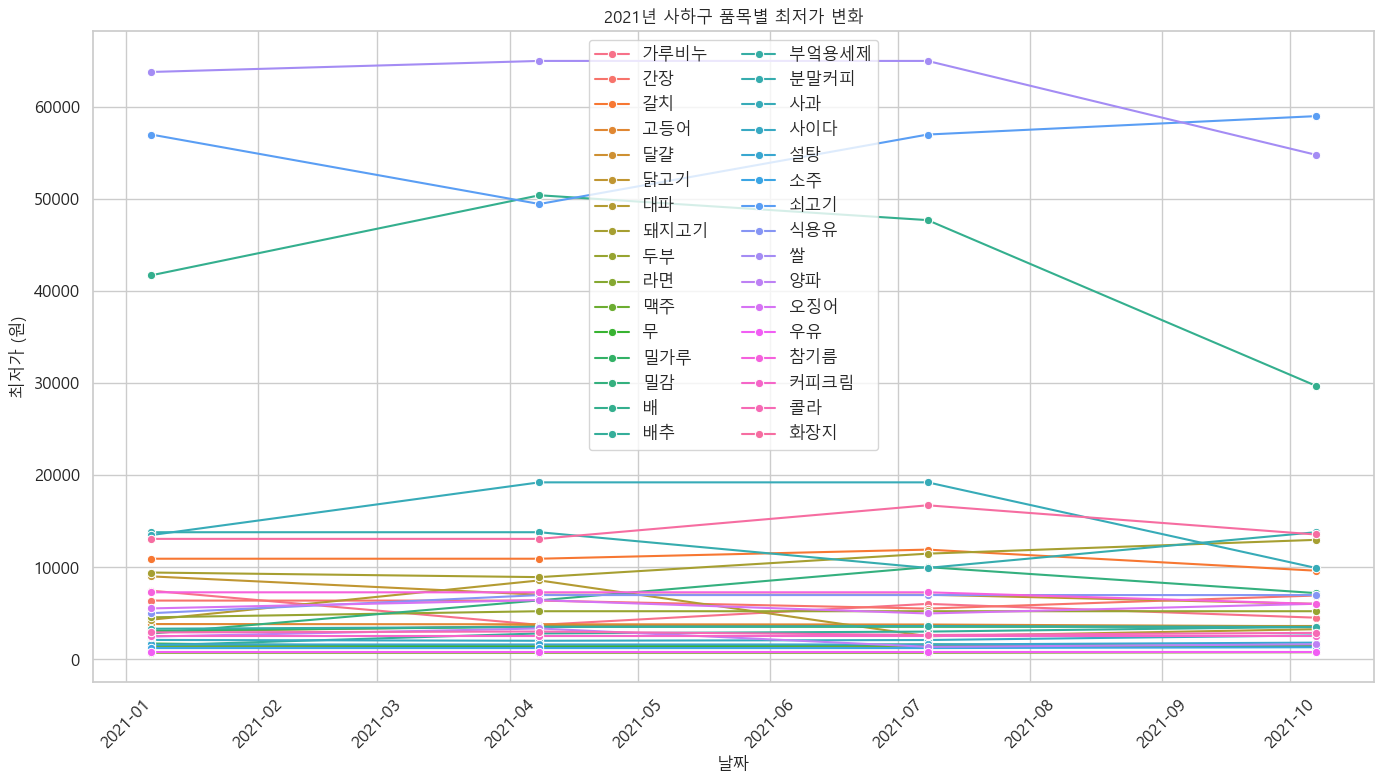

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2021_1q.csv")
q2 = pd.read_csv("사하구2021_2q.csv")
q3 = pd.read_csv("사하구2021_3q.csv")
q4 = pd.read_csv("사하구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 사하구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사하구2021_min.csv", index=False, encoding="utf-8-sig")

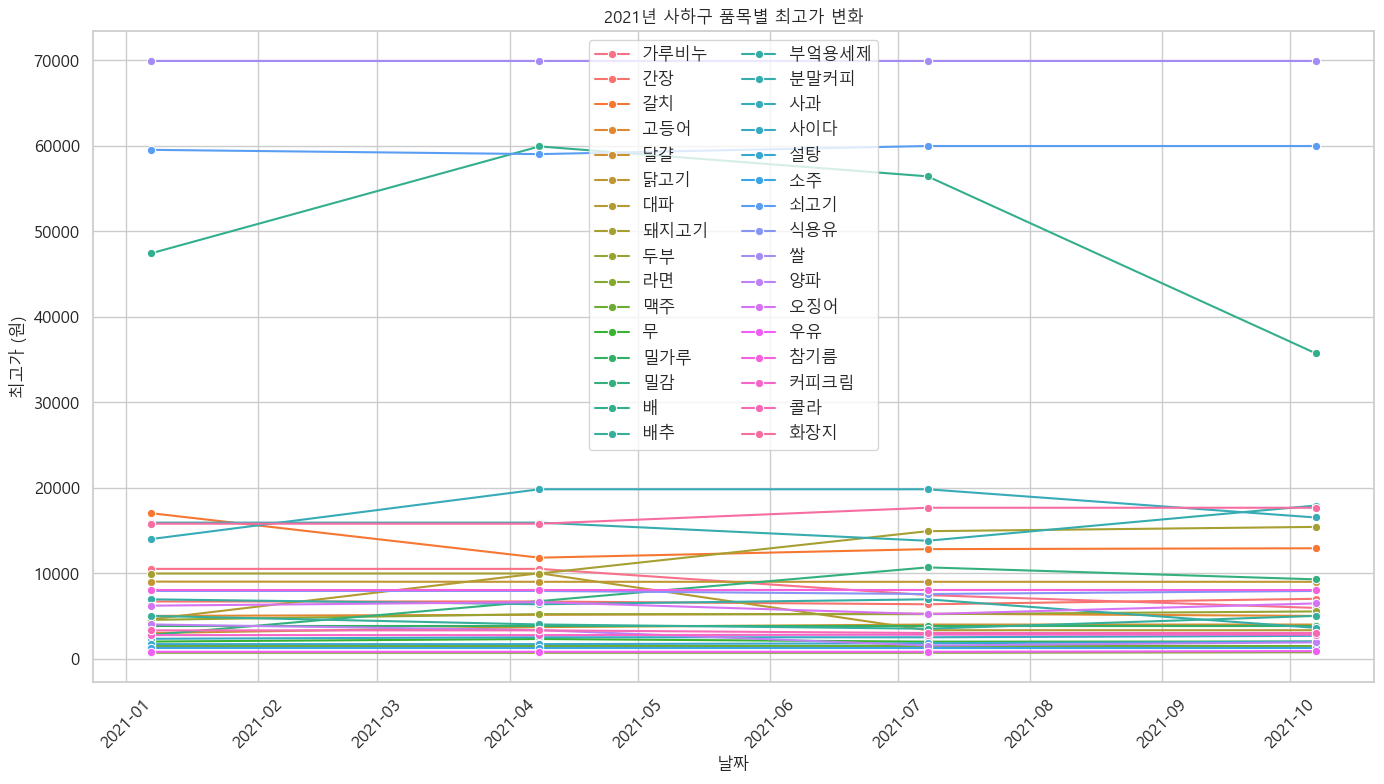

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2021_1q.csv")
q2 = pd.read_csv("사하구2021_2q.csv")
q3 = pd.read_csv("사하구2021_3q.csv")
q4 = pd.read_csv("사하구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 사하구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사하구2021_max.csv", index=False, encoding="utf-8-sig")